Bernoulli Distribution and Sampling Distribution Example Problem

Given a coin, you throw it 1000 times and get 550/1000 heads. Is it a fair coin? 

The problem is a binomial distribution where you population data is P = [1, 0, 0, 1, 1, 1] generated from a true population parameter probability p. 

From this population, we take a sampe of size N=1000, and find that p_test is 550/1000 (it is still binomial data because you can just divide the number of flips by N)

The question is if p = 0.5, what is the probability?

The underlying data comes from a population where samples are 0 (failure) or 1 (success). N is our sample and p_test = 0.55. We want to find whether the confidence interval for p contains p = 0.5. 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from scipy.stats import bernoulli, binom, norm
import seaborn as sns

In [2]:
p = 0.5
num_samples = 100000
sample_size = 1000
population_data = bernoulli(p).rvs(num_samples)

In [3]:
population_data

array([1, 0, 1, ..., 0, 1, 1])

In [4]:
# Take random samples and calculate the mean
def rand_sample_calc_proportion(num_samples, sample_size, population):
    mean_list = np.zeros(num_samples)
    for n in range(num_samples):
        random_sample = np.random.choice(population, size = sample_size, replace = True)
        mean_list[n] = np.mean(random_sample)
    return mean_list

In [5]:
sampling_distribution = rand_sample_calc_proportion(num_samples, sample_size, population_data)


In [39]:
p_hat = 0.55

Text(0.5, 0, 'Sampling Distribution of the Proportion')

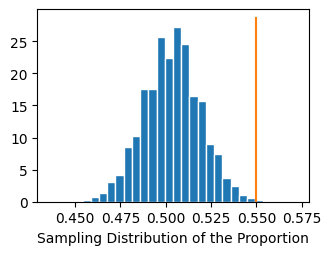

In [40]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
count, bins, ignored = ax.hist(sampling_distribution, 30, density=True, edgecolor='white')
ylim = plt.gca().get_ylim()
ax.plot([p_hat, p_hat], ylim)
plt.xlabel("Sampling Distribution of the Proportion")

We want to know the probability that we see p_hat = 0.55, that is:

p&#x0302; > p + 2 $\sigma$ <sub>p&#x0302;</sub> <br>
p&#x0302; < p - 2 $\sigma$ <sub>p&#x0302;</sub> <br>


In [34]:
np.std(sampling_distribution)

0.01579623838613486

In [37]:
# since we are pretending we dont have access to the sampling distribution we can estimate standard deviation: 
variance = (1-p)*p
variance_sampling_dist = variance/sample_size
stdev_sampling = np.sqrt(variance_sampling_dist)

In [36]:
print(stdev_sampling)

0.5


Confidence interval for p, meaning if we were to repeatedly sample from this population, and create confidence intervals each time, 95% of the time the true population parameter will fall be between the constructed intervals

critical value for 95%CI is given by:

In [22]:
critical_value_95 = norm.ppf(.025, loc = 0, scale = 1)


In [23]:
critical_value_95

-1.9599639845400545

In [38]:
p_hat = 0.55
CIupper = p_hat + critical_value_95*stdev_sampling
CIlower = p_hat - critical_value_95*stdev_sampling

print(CIlower,CIupper)

0.5809897516152281 0.5190102483847719


This interval does contains our test statistic p_test = 0.55 so we conclude that the coin is fair